In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [120]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\figure task 2.xlsx")
batch1 = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\RP_plotO2.xlsx")
#batch = batch.sort_values(by =["R/F"])
print(batch)

    feed P (psig)  Feed Rot (mm)  feed flow (sccm)  Per. P (psig)  \
0            68.0           19.0       5396.461301            0.0   
1            65.0           82.0      23289.990878            0.0   
2            50.0           74.0      21017.796646            0.0   
3            37.0           66.0      18745.602414            0.0   
4            23.0           57.0      16189.383903            0.0   
5            83.0           85.0      24142.063715            0.0   
6            64.0           94.0      26698.282226            0.0   
7            50.0           89.0      25278.160831            0.0   
8            36.0           78.0      22153.893762            0.0   
9            22.0           60.5      17183.468880            0.0   
10           81.0           90.0      25562.185110            NaN   
11           65.0           82.5      23432.003018            0.0   
12           52.0           76.0      21585.845204            0.0   
13           37.0           66.0  

Text(2.215544019299523, 13.72, 'R')

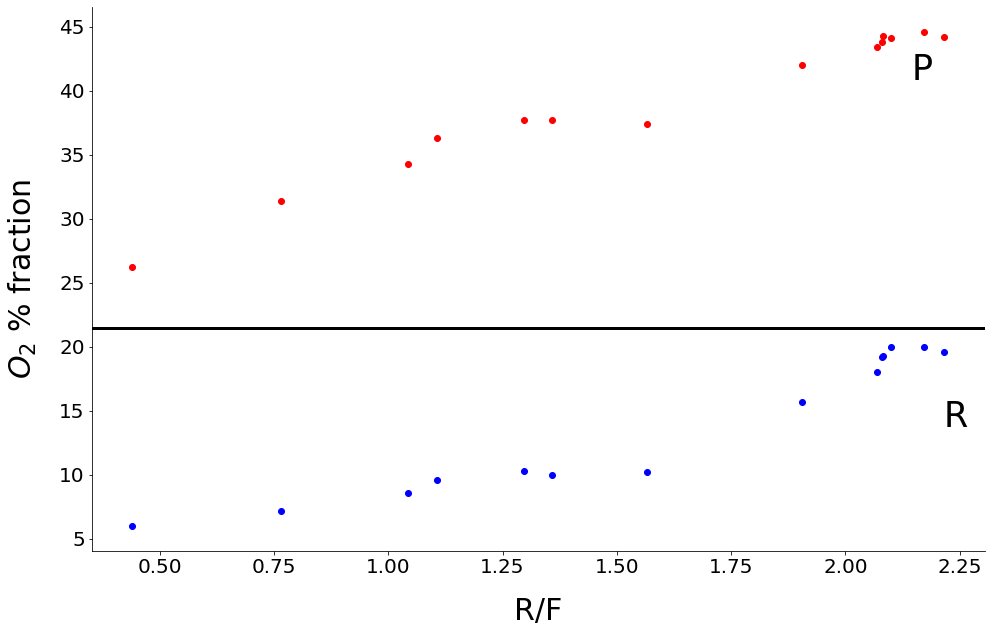

In [163]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts75.xlsx")
fig = figure(figsize = (16,10))
#total flux at permeate
n = 1
lw = 6
plt.plot(batch["R/F"],batch["Per. O2%"],'ro', markersize = lw)
plt.plot(batch["R/F"],batch["ret. O2%"],'bo', markersize = lw)
plt.axhline(y=21.5, c="black",linewidth=3)
#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")



#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"$O_2$ % fraction", fontsize = 30,labelpad=20)
plt.xlabel(r"R/F",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.annotate((r"P"),
             xy = (   batch1["R/F"].to_numpy()[1],batch1["Per. O2%"].to_numpy()[1]),
             xytext= (   2.8*(batch1["R/F"].to_numpy()[1]),(1.3*batch1["Per. O2%"].to_numpy()[1])),
             color = 'k',fontsize = 35)

plt.annotate((r"R"),
             xy = (   batch["R/F"].to_numpy()[-1],batch["ret. O2%"].to_numpy()[-1]),
             xytext= (  1*(batch["R/F"].to_numpy()[-1]),0.7*batch["ret. O2%"].to_numpy()[-1]),
             color = 'k',fontsize = 35)

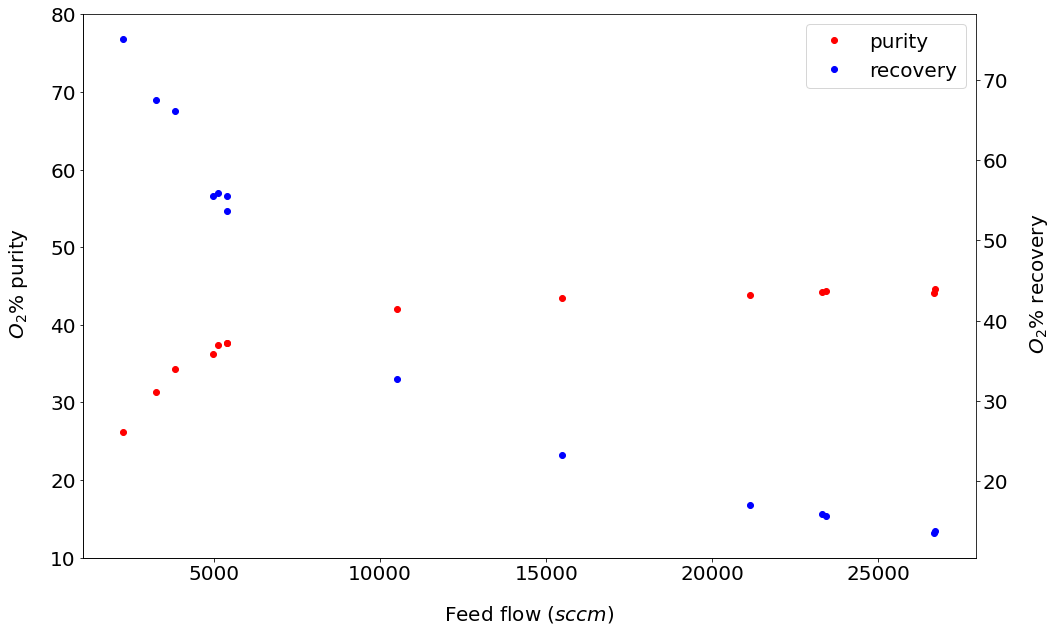

In [167]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts75.xlsx")
fig, ax1 = plt.subplots(figsize = (16, 10))
#total flux at permeate
n = 1
lw = 6
ax2 = ax1.twinx()
m1 =ax1.plot(batch["feed flow (sccm)"],batch["Per. O2%"],'ro', markersize = lw, label = r"purity")
m3 =ax2.plot(batch["feed flow (sccm)"],batch["O2_recov"],'bo', markersize = lw, label = r"recovery")


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")
lns = m1+m3
labs = [l.get_label() for l in lns]

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = ax1.legend(lns, labs, loc = 'upper right', fontsize = 20)
#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
ax1.set_ylabel(r" $O_2$% purity", fontsize = 20,labelpad=20, color = 'k')
ax1.set_ylim(10,80)
ax2.set_ylabel(r" $O_2$% recovery", fontsize = 20, labelpad = 20, color = 'k')
ax1.set_xlabel(r"Feed flow $ (sccm) $",fontsize = 20,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
fig.gca().spines['right'].set_color('none')
fig.gca().spines['top'].set_color('none')

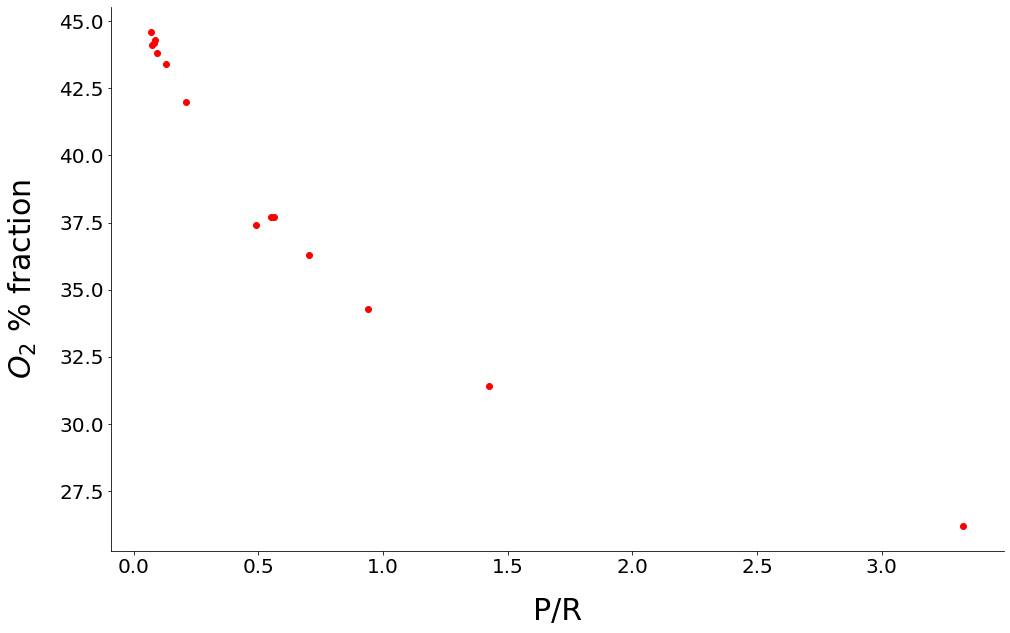

In [170]:
#analysis 2.1
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts75.xlsx")
fig = figure(figsize = (16,10))
#total flux at permeate
n = 1
lw = 6
plt.plot(1/batch["R/P"],batch["Per. O2%"],'ro', markersize = lw)
#plt.plot(batch["R/F"],batch["ret. O2%"],'bo', markersize = lw)
#plt.axhline(y=21.5, c="black",linewidth=3)
#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")



#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"$O_2$ % fraction", fontsize = 30,labelpad=20)
plt.xlabel(r"P/R",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#plt.annotate((r"P"),
#             xy = (   batch1["R/F"].to_numpy()[1],batch1["Per. O2%"].to_numpy()[1]),
#             xytext= (   2.8*(batch1["R/F"].to_numpy()[1]),(1.3*batch1["Per. O2%"].to_numpy()[1])),
#             color = 'k',fontsize = 35)

#plt.annotate((r"R"),
#             xy = (   batch1["R/F"].to_numpy()[-1],batch1["ret. O2%"].to_numpy()[-1]),
#             xytext= (  5.1*(batch1["R/F"].to_numpy()[-7]),1.5*batch1["ret. O2%"].to_numpy()[-7]),
#             color = 'k',fontsize = 35)

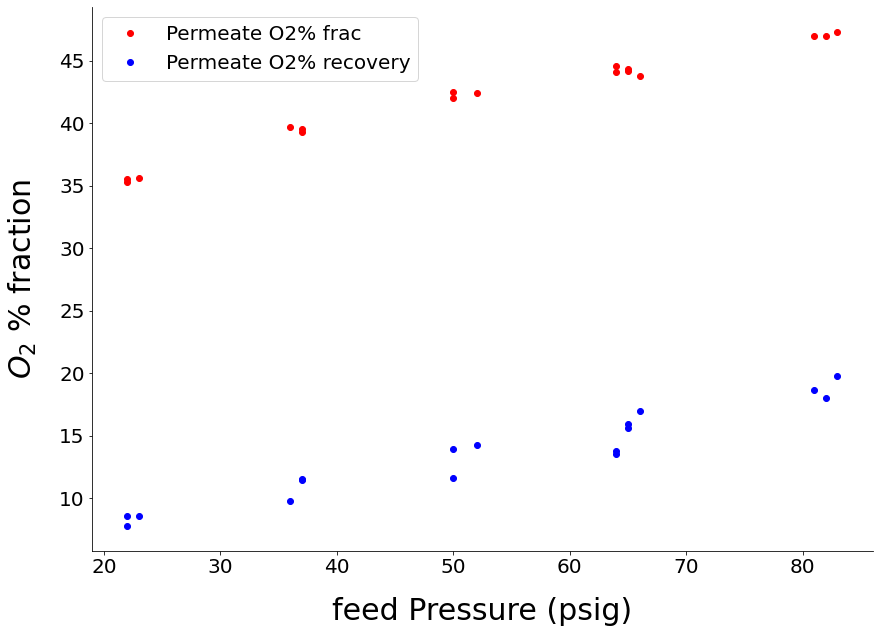

In [173]:
fig = figure(figsize = (14,10))
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts.xlsx")
x = batch[(batch["feed P (psig)"] < 67) | (batch["feed P (psig)"] >70) & (batch["Per. O2%"] > 30)]
#total flux at permeate
n = 1
lw = 6
plt.plot(x["feed P (psig)"],x["Per. O2%"],'ro', markersize = lw,label = "Permeate O2% frac")
plt.plot(x["feed P (psig)"],x["O2_recov"],'bo', markersize = lw,label = "Permeate O2% recovery")
#plt.axhline(y=21.5, c="black",linewidth=3)
#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")



legend = plt.legend(ncol = 1, loc = 'best', fontsize = 20)
plt.ylabel(r"$O_2$ % fraction", fontsize = 30,labelpad=20)
plt.xlabel(r"feed Pressure (psig)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
